# Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
# Goal: 
 To optimize the production and eliminate unprofitable parameters.

# Data description
Technological process
- Rougher feed — raw material
- Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
- Xanthate — promoter or flotation activator;
- Sulphate — sodium sulphide for this particular process;
- Depressant — sodium silicate.
- Rougher process — flotation
- Rougher tails — product residues
- Float banks — flotation unit
- Cleaner process — purification
- Rougher Au — rougher gold concentrate
- Final Au — final gold concentrate

# Parameters of stages
- air amount — volume of air
- fluid levels
- feed size — feed particle size
- feed rate

# Feature naming
 Here's how you name the features:
 [stage].[parameter_type].[parameter_name]
Example: rougher.input.feed_ag
Possible values for [stage]:
 - rougher — flotation
 - primary_cleaner — primary purification
 - secondary_cleaner — secondary purification
 - final — final characteristics
 Possible values for [parameter_type]:
 - input — raw material parameters
 - output — product parameters
 - state — parameters characterizing the current state of the stage
 - calculation — calculation characteristics

In [65]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline


from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None   

In [2]:
#importing Datasets 
try:
    train = pd.read_csv('gold_recovery_train (1).csv')
    test = pd.read_csv( 'gold_recovery_test.csv')
    full= pd.read_csv('gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv( '/datasets/gold_recovery_test.csv')
    full= pd.read_csv('/datasets/gold_recovery_full.csv')


In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values.

# Recovery calculation

Recovery = ((C x (F-T)) /(F x (C-T))) x 100

where:
 
 
 - C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
- F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
- T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

.

In [9]:
C, F, T = train['rougher.output.concentrate_au'],train[ 'rougher.input.feed_au'], train['rougher.output.tail_au']

In [10]:
train['recovery'] =  (100* ((C*(F-T)) / (F*(C-T)))).round(6)

In [11]:
train[['recovery','rougher.output.recovery']]

,recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [12]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing}).reset_index()
missing_cols = missing_value_df[missing_value_df['percent_missing'] >= 5]
missing_cols

,index,percent_missing
5,final.output.recovery,9.021352
10,primary_cleaner.input.sulfate,7.752076
11,primary_cleaner.input.depressant,7.485172
13,primary_cleaner.input.xanthate,5.842230
33,rougher.calculation.au_pb_ratio,7.366548
40,rougher.input.floatbank10_sulfate,6.192171
43,rougher.input.floatbank11_xanthate,11.293001
48,rougher.output.recovery,15.260973
49,rougher.output.tail_ag,13.345196
51,rougher.output.tail_sol,13.339265


In [13]:
mae = (train['rougher.output.recovery']-train['recovery']).abs().mean()
mae

2.448245309222317e-07

We can see that our recovery calculation was calculated correctly, We had a some missing values so mean absolute error was calcualted manually . We can see that we got 2.44 that mean that the predicted values will be off 2.44 which really good.

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [14]:
# using  np.setdiff1d() which takes the difference from two arrays  
L = np.setdiff1d(train.columns, test.columns).tolist()
print(f'We can see we have {len(L)} missing columns')

We can see we have 35 missing columns


In [15]:
train[L].dtypes

final.output.concentrate_ag                           float64
final.output.concentrate_au                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_au                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.tail_pb                        float64
primary_

The features missing in the test set are either outputs of the process, or calculations based on those outputs and thus can't be used in our models.

# Data preprocessing

In [16]:
#dropping the Recovery column we named earlier because the data was correct 
train.drop(columns = 'recovery',inplace = True)

In [17]:
#Checking for duplicates in the train dataset
train[train.duplicated()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [18]:
#Checking for duplicates in the test dataset
test[test.duplicated()]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [19]:
#changing date column to datetime 
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)
full['date'] = pd.to_datetime(full.date)

In [20]:
#getting target columns from the full dataset
test = test.merge(full[['date','rougher.output.recovery', 'final.output.recovery']], how = 'left',on = 'date')

In [21]:
#checking for na values in the test dataset
display((test.isna().sum() /len(test))*100)

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [22]:
#checking for na values in the train dataset
display((train.isna().sum() /len(test))*100)

date                                          0.000000
final.output.concentrate_ag                   1.229508
final.output.concentrate_pb                   1.229508
final.output.concentrate_sol                  6.318306
final.output.concentrate_au                   1.212432
                                                ...   
secondary_cleaner.state.floatbank5_a_level    1.451503
secondary_cleaner.state.floatbank5_b_air      1.451503
secondary_cleaner.state.floatbank5_b_level    1.434426
secondary_cleaner.state.floatbank6_a_air      1.758880
secondary_cleaner.state.floatbank6_a_level    1.451503
Length: 87, dtype: float64

In [23]:
# Replace infinite updated data with nan
test = test.replace([np.inf, -np.inf], np.nan)
train = train.replace([np.inf, -np.inf], np.nan)


In [24]:
test = test.ffill(axis = 0)
train = train.ffill(axis = 0)

In [25]:
display(train.isna().sum().sum())

0

In [26]:
display(test.isna().sum().sum())

0

We can see had alot of nan values. I replaced them with the previous value of there columns. Now that we preprocessed that data we can move on to EDA 

# Exploratory Data Analysis

The concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

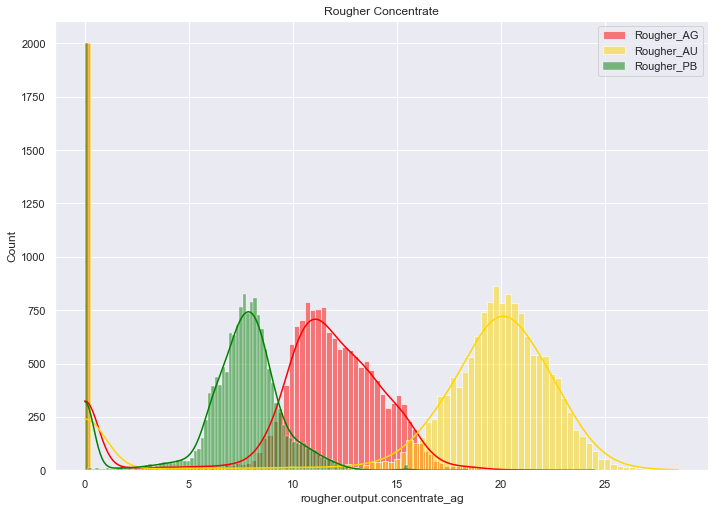

In [27]:
sns.histplot(data = train , x =  'rougher.output.concentrate_ag' , color = 'red', label='Rougher_AG', kde=True) 
sns.histplot(data = train , x =  'rougher.output.concentrate_au' , color = 'gold', label='Rougher_AU', kde=True) 
sns.histplot(data = train , x =  'rougher.output.concentrate_pb' , color = 'green', label='Rougher_PB', kde=True)

plt.legend() 
plt.title("Rougher Concentrate")
plt.show()

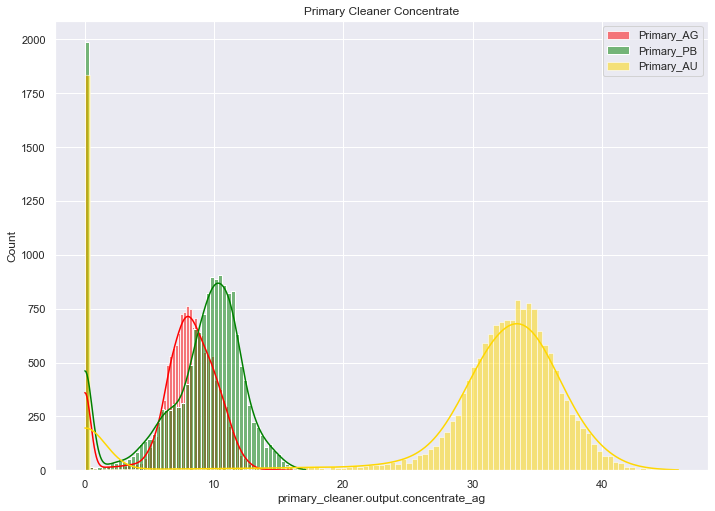

In [28]:
sns.histplot(data = train , x =  'primary_cleaner.output.concentrate_ag' , color = 'red', label='Primary_AG', kde=True) 
sns.histplot(data = train , x =  'primary_cleaner.output.concentrate_pb' , color = 'green', label='Primary_PB', kde=True) 
sns.histplot(data = train , x =  'primary_cleaner.output.concentrate_au' , color = 'gold', label='Primary_AU', kde=True) 

plt.legend() 
plt.title('Primary Cleaner Concentrate')
plt.show()

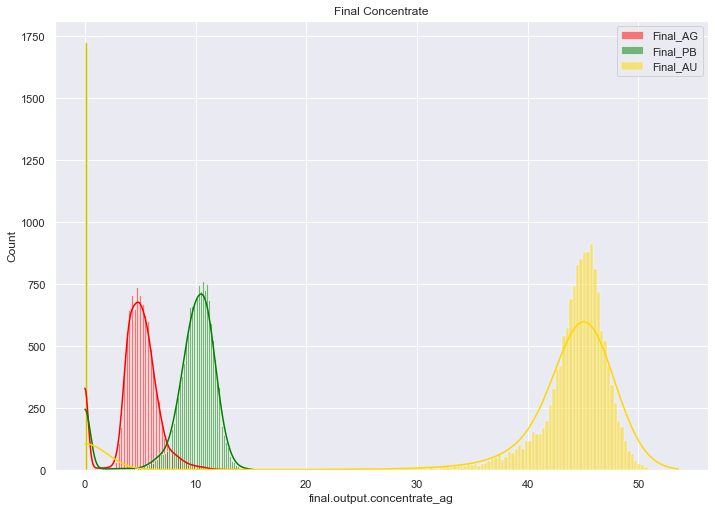

In [29]:
sns.histplot(data = train , x =  'final.output.concentrate_ag' , color = 'red', label='Final_AG', kde=True) 
sns.histplot(data = train , x =  'final.output.concentrate_pb' , color = 'green', label='Final_PB', kde=True) 
sns.histplot(data = train , x =  'final.output.concentrate_au' , color = 'gold', label='Final_AU', kde=True)

plt.legend() 
plt.title("Final Concentrate")
plt.show()

As we proceed forward in the concentration stages we can gold is concentrated more through out the process

Feed particle size distributions

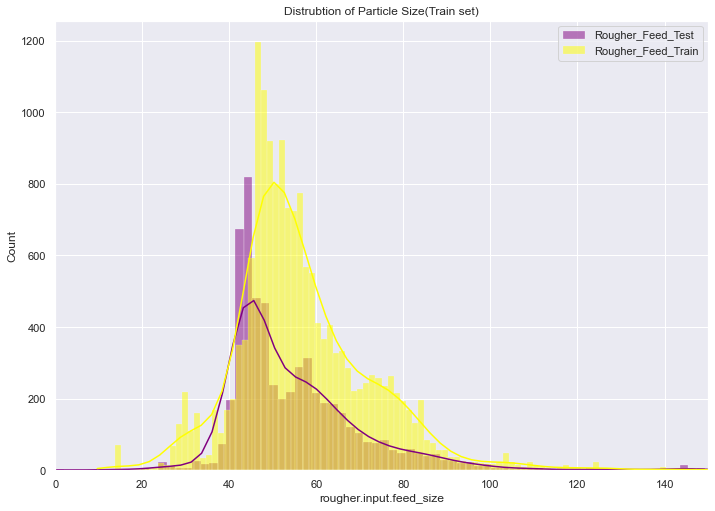

In [30]:
sns.histplot(data = test, x = 'rougher.input.feed_size', color = 'purple', label = 'Rougher_Feed_Test',  kde = True)
sns.histplot(data = train, x = 'rougher.input.feed_size', color = 'yellow', label = 'Rougher_Feed_Train',  kde = True)
plt.legend() 
plt.xlim((0,150))
plt.title("Distrubtion of Particle Size(Train set)")
plt.show()

We can see that the Test and Train dataset are equally distrubuted the same and we can see that after the primary feed the particle size is more concentrated

# Concetration of All Metals at different stages

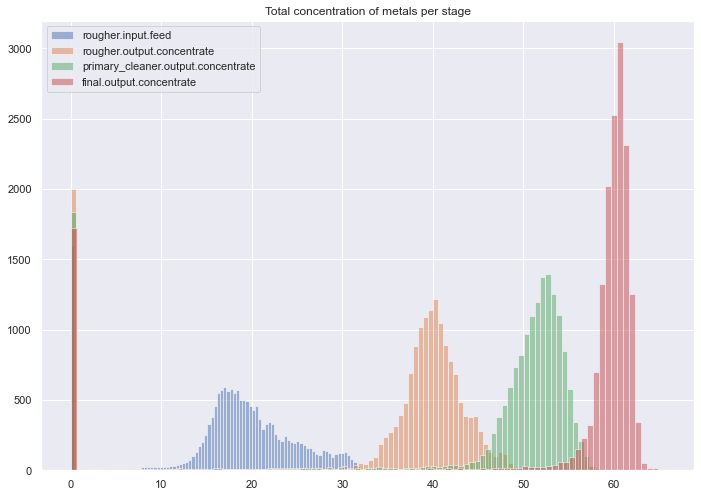

In [31]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed','rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
for stage in stages:
    train[stage+'_all_metals'] = 0
    for metal in metals:
        train[stage+'_all_metals'] += train[stage+'_'+metal]
    plt.hist(train[stage+'_all_metals'], bins=100, label=stage, alpha=.5)
    plt.title('Total concentration of metals per stage')
    plt.legend();

We can  see after going through all stages we can see the concentration is very high at the end of the final stage and theres alot of rows with zero concentration. we will remove these 

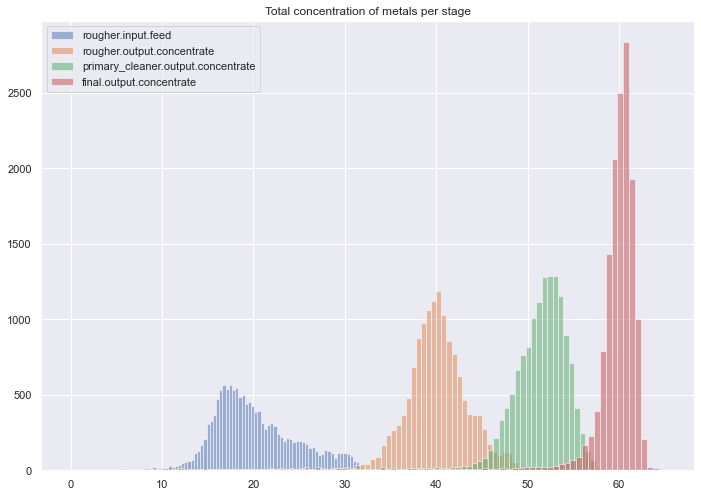

In [32]:
# Turning all values below 0.01 into nan and then droping them 
for i,metal in enumerate(metals):
    for stage in stages:
        train[train[stage+'_'+metal]<0.01] = np.nan
train = train.dropna(how='any', axis=0)

metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed','rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
for stage in stages:
    train[stage+'_all_metals'] = 0
    for metal in metals:
        train[stage+'_all_metals'] += train[stage+'_'+metal]
    plt.hist(train[stage+'_all_metals'], bins=100, label=stage, alpha=.5)
    plt.title('Total concentration of metals per stage')
    plt.legend();


We can see that we successfully removed all the rows with 0 total concentration. 

# Target Analysis

# Correlation of our Final and Rougher output

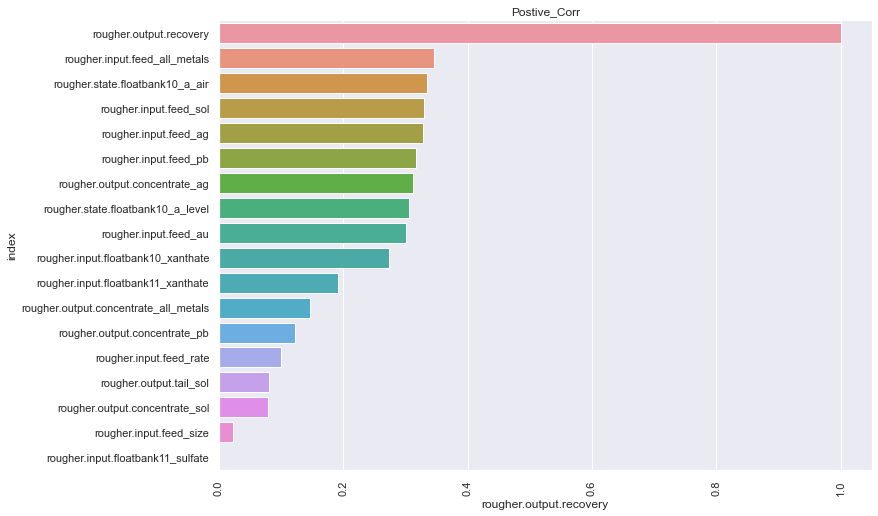

In [33]:
correlations = train.corr()
train_final_corr = correlations['rougher.output.recovery'].to_frame().reset_index()


# These have higher correlation to the rougher output recovery
postive = train_final_corr[train_final_corr['rougher.output.recovery'] >0].sort_values('rougher.output.recovery', ascending = False)
r = postive['index'].str.contains('rougher')
sns.barplot(data = postive[r], x = 'rougher.output.recovery', y= 'index')
plt.xticks(rotation=90)
plt.title('Postive_Corr')
plt.show()

In [34]:
#negative corr
negative = train_final_corr[train_final_corr['rougher.output.recovery'] <0].sort_values('rougher.output.recovery', ascending = True)
r = negative['index'].str.contains('rougher')
negative[r]

,index,rougher.output.recovery
51,rougher.output.tail_au,-0.564390
49,rougher.output.tail_pb,-0.464637
48,rougher.output.tail_ag,-0.344934
56,rougher.state.floatbank10_c_air,-0.276453
58,rougher.state.floatbank10_d_air,-0.272047
54,rougher.state.floatbank10_b_air,-0.233955
60,rougher.state.floatbank10_e_air,-0.201803
59,rougher.state.floatbank10_d_level,-0.160044
55,rougher.state.floatbank10_b_level,-0.158208
57,rougher.state.floatbank10_c_level,-0.157907


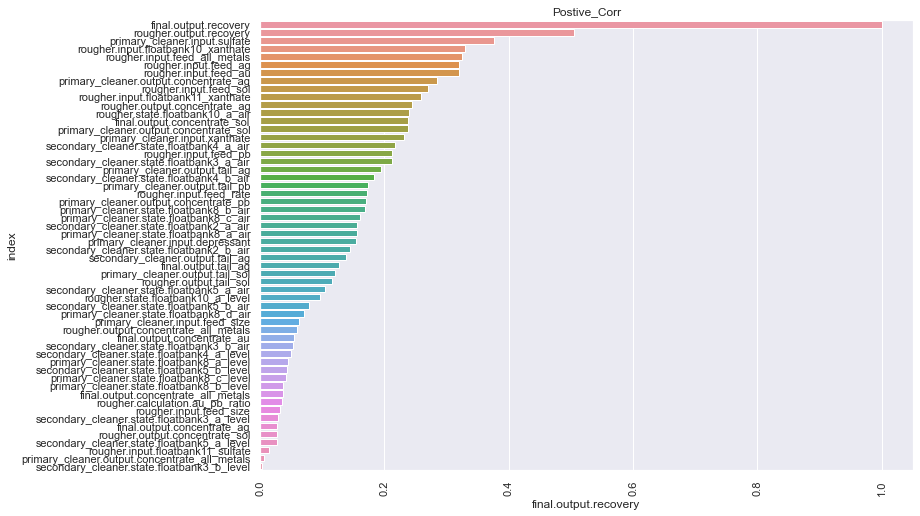

In [35]:
#corr
correlations = train.corr()
train_final_corr = correlations['final.output.recovery'].to_frame().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# These have higher correlation to the final output recovery
postive = train_final_corr[train_final_corr['final.output.recovery'] >0].sort_values('final.output.recovery', ascending = False)

sns.barplot(data = postive, x = 'final.output.recovery', y= 'index')
plt.xticks(rotation=90)
plt.title('Postive_Corr')
plt.show()


In [36]:

# These have negative correlation to the final output recovery
negative = train_final_corr[train_final_corr['final.output.recovery'] <0].sort_values('final.output.recovery', ascending = True)
negative


,index,final.output.recovery
8,final.output.tail_au,-0.466227
20,primary_cleaner.output.tail_au,-0.420246
67,secondary_cleaner.output.tail_au,-0.385607
51,rougher.output.tail_au,-0.336173
49,rougher.output.tail_pb,-0.331478
16,primary_cleaner.output.concentrate_au,-0.200385
56,rougher.state.floatbank10_c_air,-0.186467
58,rougher.state.floatbank10_d_air,-0.179137
48,rougher.output.tail_ag,-0.158351
6,final.output.tail_pb,-0.157787


We can see Which columns have a postive correlation to our final and rougher output. We can see theres alot of negative columns impacting our final output.

# Standard Scale 

In [37]:
L = np.setdiff1d(train.columns, test.columns).tolist()
train = train.drop(columns = L)

In [38]:
#Separating our columns for x_train x_test y_train y_test
X_train = train.drop(['final.output.recovery','rougher.output.recovery','date'],axis = 1)
X_valid = test.drop(['final.output.recovery','rougher.output.recovery','date'],axis = 1)

y_train = train[['final.output.recovery','rougher.output.recovery']].values
y_valid = test[['final.output.recovery','rougher.output.recovery']].values




# Evaluation metric
Let's write a function to calculate the final sMAPE value.

sMAPE is a symmetric Mean Absolute Percentage Error.

It is similar to MAE, but is expressed in relative values instead of absolute ones. It equally takes into account the scale of both the target and the prediction.

In [39]:
def smape(act, forc):
    return (np.abs(act-forc)/((np.abs(act) + np.abs(forc))/2)).mean()

In [40]:
def smape_final(act,forc):
    smape_rougher = smape(act[:,0], forc[:,0])
    smape_final = smape(act[:,1], forc[:,1])
    return 0.25*smape_rougher + 0.75*smape_final

In [41]:
# Smape_final as our scoring methods for our cross validation. 
def crossval(model, X_train, y_train, cv):
    smape_score = make_scorer(smape_final)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring = smape_score)
    return scores.mean()

# Model Selection

Lets use Four regression model to predict our target variables, Linear,lasso,RandomForest and ElasticNet

In [42]:
dum = Pipeline([('scalar5',StandardScaler()), ('Dummy', DummyRegressor(strategy="mean"))])
lr = Pipeline([('scalar1',StandardScaler()), ('LR',LinearRegression())])
rfr =  Pipeline([('scalar2',StandardScaler()), ('RFR',RandomForestRegressor(n_estimators = 10,random_state =1))])
el = Pipeline([('scalar4',StandardScaler()), ('Elnet', ElasticNet(random_state =1))])
lasso = Pipeline([('scalar3',StandardScaler()), ('Lasso',Lasso(random_state = 1))])


In [43]:
base_model = crossval(dum,X_train,y_train,5)
lr_model = crossval(lr,X_train,y_train,5)
el_model = crossval(el,X_train,y_train,5)
lasso_model = crossval(lasso,X_train,y_train,5)
rfr_model = crossval(rfr, X_train,y_train,5)


In [44]:
d = {'Base Model':base_model, 'Linear Regression':lr_model, 'Elastic_net': el_model,'Lasso':lasso_model, 'RandomForest':rfr_model}
new_data = pd.DataFrame( data = d ,index=[0])
new_data.head()

,Base Model,Linear Regression,Elastic_net,Lasso,RandomForest
0,0.089511,0.090959,0.076847,0.08053,0.100879


We can see that Elastic_Net was our best result 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

cols = list(X_train.columns)
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_valid[cols] = scaler.transform(X_valid[cols])
X_test[cols] = scaler.transform(X_test[cols])



In [66]:

smape_score = make_scorer(smape_final)
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

                    


model = GridSearchCV(ElasticNet(random_state = 1,),parametersGrid, scoring = smape_score).fit(X_train,y_train)
predict = model.predict(X_test)
print(smape_final(y_test,predict)*100)   


    

8.68720157114929


In [67]:
results= pd.DataFrame(model.cv_results_)
display(results[results['mean_test_score'] == results.mean_test_score.min()])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
62,0.017541,0.001352,0.001794,0.000399,0.01,0.0,10,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 10}",0.061346,0.064026,0.059523,0.061095,0.063573,0.061913,0.001669,210


Aftering Tuning the alpha parameter, alpha = 1 is our lowest score

In [61]:
#Using base model to get a smape_final
test_basemodel = DummyRegressor(strategy = 'mean')
test_basemodel.fit(X_valid,y_valid)
predict = test_basemodel.predict(X_valid)
print(smape_final(y_valid,predict)*100)

10.73352410963514


In [72]:
model = ElasticNet(alpha= 1, l1_ratio =  0.0, max_iter =  1000)
model = model.fit(X_valid,y_valid)
predict = model.predict(X_valid)
print(smape_final(y_valid,predict)*100)


9.36953063614576


We can see that our Model had a lower score then our Dummy Regressor. 

In [63]:
data = pd.DataFrame(data = {'features':model.feature_names_in_, 'Coef':model.coef_[0]})
data.sort_values('Coef' ,ascending = False)

,features,Coef
0,primary_cleaner.input.sulfate,1.061237
16,rougher.input.feed_sol,1.035313
40,secondary_cleaner.state.floatbank3_b_air,0.497482
19,rougher.input.floatbank10_xanthate,0.340940
1,primary_cleaner.input.depressant,0.337435
3,primary_cleaner.input.xanthate,0.272946
50,secondary_cleaner.state.floatbank6_a_air,0.268497
38,secondary_cleaner.state.floatbank3_a_air,0.246257
17,rougher.input.feed_au,0.210780
21,rougher.input.floatbank11_xanthate,0.188820


In [64]:
data = pd.DataFrame(data = {'features': model.feature_names_in_ , 'Coef':model.coef_[1]})
data.sort_values('Coef' ,ascending = False)

,features,Coef
40,secondary_cleaner.state.floatbank3_b_air,1.030636
0,primary_cleaner.input.sulfate,1.004445
16,rougher.input.feed_sol,0.522246
36,secondary_cleaner.state.floatbank2_b_air,0.460147
21,rougher.input.floatbank11_xanthate,0.355639
19,rougher.input.floatbank10_xanthate,0.289128
3,primary_cleaner.input.xanthate,0.266349
44,secondary_cleaner.state.floatbank4_b_air,0.242456
38,secondary_cleaner.state.floatbank3_a_air,0.222833
17,rougher.input.feed_au,0.111384


We can see some our best feautures have high correlations to target columns. Those columns infer that they are most profitable at the Rougher and Final Section

# Conclusion

Zyfra. The company develops efficiency solutions for heavy industry. We created a model that would predict the amount of gold recovered from gold ore.
First we familiarized ourself with the process and the data. Then we went into and check our recovery calculation  and Used MAE between rougher.output,recovery
Which was close to zero. Then we went on to process our data and checked na values and filled in with the mean. 
In the following section we have performed an exploratory data analysis and reached the following conclusions
As for the gold concentration (au), there is a clear trend towards quality improvement after each stage: the share of gold is higher and higher on average as we proceed with purification 
WE see the opposite trend for other metals : the more we purify the feed, the lower gets the share of this metal
The train and test distributions of feed particle sizes are very close to each other, which means that we will not have a problem of applying a model trained on the train set to the test set
In the next step we developed and tested, using cross-validation, several ML algorithms and tuned the best model's hyperparameters. Elastic Net regression model showed the lowest score with a score of 9%